In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [81]:
consume_data = pd.read_csv('/home/julian/Cursos/Ironhack/Career/reto_data/consume_data.csv')

### EDA

In [6]:
consume_data.shape

(376, 11)

In [26]:
consume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   consume_id    376 non-null    int64  
 1   distance      376 non-null    float64
 2   consume       376 non-null    float64
 3   speed         376 non-null    int64  
 4   temp_inside   376 non-null    float64
 5   temp_outside  376 non-null    int64  
 6   gas_type      376 non-null    object 
 7   AC            376 non-null    int64  
 8   rain          376 non-null    int64  
 9   sun           376 non-null    int64  
 10  snow          376 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 32.4+ KB


In [12]:
consume_data.isna().value_counts()

consume_id  distance  consume  speed  temp_inside  temp_outside  gas_type  AC     rain   sun    snow 
False       False     False    False  False        False         False     False  False  False  False    376
dtype: int64

In [23]:
consume_data.gas_type.value_counts()

SP98    219
E10     157
Name: gas_type, dtype: int64

In [82]:
consume_data = pd.get_dummies(consume_data, columns=['gas_type'], drop_first=True)

In [83]:
consume_data.drop(columns=['consume_id'], inplace=True)

In [34]:
consume_data.head(3)

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,snow,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0,0


In [39]:
consume = {'Minimum': consume_data.consume.min(),
          'Maximum': consume_data.consume.max(),
          'Mean': consume_data.consume.mean(),
          'Median': consume_data.consume.median(),
          'Mode': consume_data.consume.mode()}

In [40]:
consume_descr = pd.DataFrame(consume) 
consume_descr = consume_descr.rename(index={0:'Consume'})
consume_descr

,Minimum,Maximum,Mean,Median,Mode
Consume,3.3,12.2,4.925266,4.7,4.5


<AxesSubplot:xlabel='consume', ylabel='Count'>

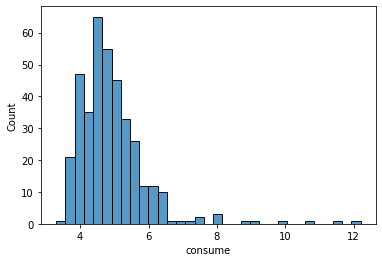

In [41]:
sns.histplot(x='consume', data=consume_data)

In [36]:
corr_matrix = consume_data.corr()

In [37]:
corr_matrix

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,snow,gas_type_SP98
distance,1.000000,-0.131379,0.565505,0.075305,0.086774,0.019030,-0.030784,0.078627,-0.034428,-0.047877
consume,-0.131379,1.000000,-0.234537,-0.161991,-0.318758,0.089472,0.251756,-0.169173,0.072308,-0.020928
speed,0.565505,-0.234537,1.000000,0.059725,0.019327,-0.024485,-0.004173,0.077181,0.032500,-0.099495
temp_inside,0.075305,-0.161991,0.059725,1.000000,0.361308,0.313197,-0.038269,0.246120,0.097156,0.010340
temp_outside,0.086774,-0.318758,0.019327,0.361308,1.000000,0.180096,-0.184763,0.349988,-0.162948,0.156990
AC,0.019030,0.089472,-0.024485,0.313197,0.180096,1.000000,0.242197,0.085928,0.063170,0.096943
rain,-0.030784,0.251756,-0.004173,-0.038269,-0.184763,0.242197,1.000000,-0.111916,0.277739,0.052789
sun,0.078627,-0.169173,0.077181,0.246120,0.349988,0.085928,-0.111916,1.000000,-0.031083,0.038120
snow,-0.034428,0.072308,0.032500,0.097156,-0.162948,0.063170,0.277739,-0.031083,1.000000,0.035231
gas_type_SP98,-0.047877,-0.020928,-0.099495,0.010340,0.156990,0.096943,0.052789,0.038120,0.035231,1.000000


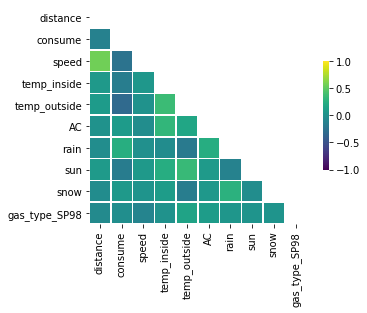

In [38]:
mascara = np.triu(np.ones_like(corr_matrix, dtype=bool))
color_map = sns.diverging_palette(0, 10, as_cmap=True) 

sns.heatmap(corr_matrix, 
            mask=mascara,
            cmap="viridis",
            vmax=1,
            vmin=-1,
            square=True, 
            linewidth=.5, 
            cbar_kws={"shrink": .5} 
);

#### El consumo esta mayormente correlacionado con temp_outside (negativamente), rain (positivamente), speed (negativamente), sun (negativamente), temp_inside (negativamente)

#### CONSUME VS GAS_TYPE

In [60]:
gtype_gr = consume_data.groupby('gas_type_SP98').agg({'consume': 'mean'})
gtype_gr

,consume
gas_type_SP98,
0,4.950955
1,4.906849


<AxesSubplot:xlabel='consume', ylabel='gas_type_SP98'>

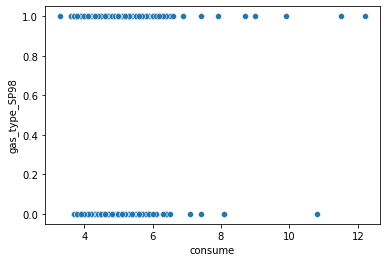

In [44]:
sns.scatterplot(x=consume_data.consume, y=consume_data.gas_type_SP98)

#### CONSUME VS AC

In [61]:
ac_group = consume_data.groupby('AC').agg({'consume': 'mean'})
ac_group

,consume
AC,
0,4.897391
1,5.235484


#### CONSUME VS RAIN

In [66]:
rain_gr = consume_data.groupby('rain').agg({'consume': 'mean'})
rain_gr

,consume
rain,
0,4.827576
1,5.626087


### CONSUME COST

In [84]:
def price(x):
    E10_price = 1.379
    SP98_price = 1.459
    if x == 0:
        return E10_price
    else:
        return SP98_price

In [85]:
consume_data['price'] = consume_data.gas_type_SP98.apply(price)

In [86]:
consume_data['cost_per_distance'] =(((consume_data.consume)/100) * (consume_data.distance)) * consume_data.price 

In [87]:
consume_data.gro

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,snow,gas_type_SP98,price,cost_per_distance
0,28.0,5.0,26,21.5,12,0,0,0,0,0,1.379,1.930600
1,12.0,4.2,30,21.5,13,0,0,0,0,0,1.379,0.695016
2,11.2,5.5,38,21.5,15,0,0,0,0,0,1.379,0.849464


In [93]:
price_gr = consume_data.groupby('gas_type_SP98').agg({'cost_per_distance': 'mean', 'distance': 'mean'})
price_gr

,cost_per_distance,distance
gas_type_SP98,,
0,1.396125,21.095541
1,1.305041,18.866667


### REGRESSION ANALYSIS

In [94]:
X = consume_data.drop(columns=['consume', 'price', 'cost_per_distance'])

In [95]:
y = consume_data.consume

In [100]:
linear_model = sm.OLS(y,X)

In [101]:
results = linear_model.fit()

In [102]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                consume   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              1041.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                   3.68e-255
Time:                        14:06:14   Log-Likelihood:                         -524.89
No. Observations:                 376   AIC:                                      1068.
Df Residuals:                     367   BIC:                                      1103.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
distance          0.0007      0.003      0.241      0.810      -0.005       0.006
speed            -0.0154      0.005     -3.397      0.001      -0.024      -0.006
temp_inside       0.2756      0.010     28.897      0.000       0.257       0.294
temp_outside     -0.0509      0.008     -6.121      0.000      -0.067      -0.035
AC                0.0981      0.197      0.497      0.619      -0.290       0.486
rain              0.6467      0.171      3.791      0.000       0.311       0.982
sun              -0.2943      0.199     -1.481      0.140      -0.685       0.097
snow             -0.6379      0.524     -1.218      0.224      -1.667       0.392
gas_type_SP98     0.0371      0.105      0.352      0.725      -0.170       0.244
==============================================================================
Omnibus:                      250.941   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.675
Skew:                           2.663   Prob(JB):                         0.00
Kurtosis:                      16.070   Cond. No.                         573.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""